In [ ]:
#подключаем библиотеки
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
#чтобы не срабатывали предупреждения
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#загрузим стоп-слова
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('russian')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [ ]:
#скачаем маски изображений для заполнения словами
import requests
files_ls = {'ball' : 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1jSJbDzFwvO40LQxXoeJTTU7HleYW7Hu5', 
            'brain' : 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1V6HuLZ8YNpT7j7cPIID51JaJY-PdInbP',
            'cloud' : 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1vBeHU3X9Mx2Q4PRRLqbbcTv76OAwQr_W'}

for key, img_url in files_ls.items():
  img_data = requests.get(img_url).content
  with open(key+'.png', 'wb') as handler:
    handler.write(img_data)

In [ ]:
#  Введем текст:
text = '''
Актуальность задач обнаружения и распознавания объектов на изображениях и их последовательностях с годами только возрастает. 
За последние несколько десятилетий
предложено огромное количество подходов и методов обнаружения как аномалий, то есть
областей изображения, характеристики которых отличаются от прогнозных, так и объектов
интереса, о свойствах которых есть априорная информация, вплоть до библиотеки эталонов.
В работе предпринята попытка системного анализа тенденций развития подходов и методов
обнаружения, причин этого развития, а также метрик, предназначенных для оценки качества и 
достоверности обнаружения объектов. Рассмотрено обнаружение на основе математических моделей изображений. 
При этом особое внимание уделено подходам на основе
моделей случайных полей и отношения правдоподобия. Проанализировано развитие сверточных нейронный сетей, 
направленных на задачи распознавания и обнаружения, включая
ряд предобученных архитектур, обеспечивающих высокую эффективность при решении
данной задачи. В них для обучения используются уже не математические модели, а библиотеки реальных снимков. 
Среди характеристик оценки качества обнаружения рассмотрены
вероятности ошибок первого и второго рода, точность и полнота обнаружения, пересечение
по объединению, интерполированная средняя точность. Также представлены типовые тесты, которые применяются 
для сравнения различных нейросетевых алгоритмов
'''
#преобразуем в нижний регистр и избавимся от стоп-слов
text = text.lower()
txt = []
for w in text.split():
  if w in stopwords.words('russian'):
    continue
  txt.append(w)
txt = ' '.join(txt)
print(txt)

актуальность задач обнаружения распознавания объектов изображениях последовательностях годами возрастает. последние несколько десятилетий предложено огромное количество подходов методов обнаружения аномалий, областей изображения, характеристики которых отличаются прогнозных, объектов интереса, свойствах которых априорная информация, вплоть библиотеки эталонов. работе предпринята попытка системного анализа тенденций развития подходов методов обнаружения, причин развития, также метрик, предназначенных оценки качества достоверности обнаружения объектов. рассмотрено обнаружение основе математических моделей изображений. особое внимание уделено подходам основе моделей случайных полей отношения правдоподобия. проанализировано развитие сверточных нейронный сетей, направленных задачи распознавания обнаружения, включая ряд предобученных архитектур, обеспечивающих высокую эффективность решении данной задачи. обучения используются математические модели, библиотеки реальных снимков. среди характер

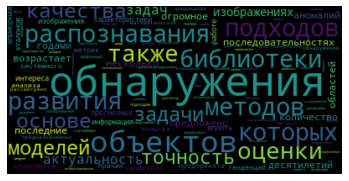

In [ ]:
# Создадим облако слов
wordcloud = WordCloud().generate(txt)

# Выведем его на экран
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#преобразуем все маски изображений в двумерные массивы numpy
cloud_masks = []
for mask_img in files_ls.keys():
    cloud_mask = np.array(Image.open(mask_img+'.png'))
    if len(cloud_mask.shape) == 3:
      cloud_mask = cloud_mask[:,:,0]
    cloud_masks.append(cloud_mask)

In [ ]:
#создадим функцию для инвертирования объекта в контейнер для облака слов
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
#выполним преобразование всех масок в соответствии с описанной выше функцией
transformed_cloud_masks = []
for cm in cloud_masks:
  transformed_cloud_mask = np.ndarray((cm.shape[0],cm.shape[1]), np.int32)
  for i in range(len(cm)):
    transformed_cloud_mask[i] = list(map(transform_format, cm[i]))
  transformed_cloud_masks.append(transformed_cloud_mask)

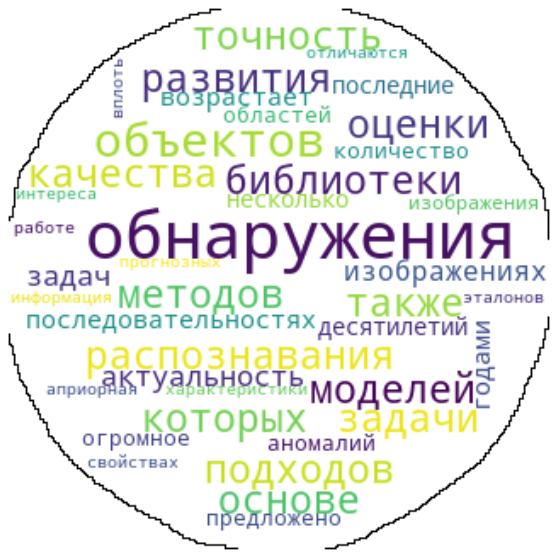

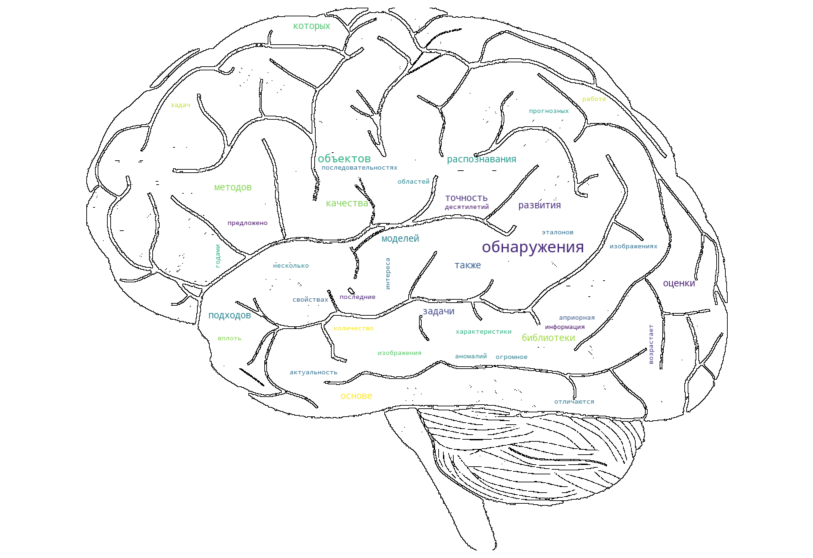

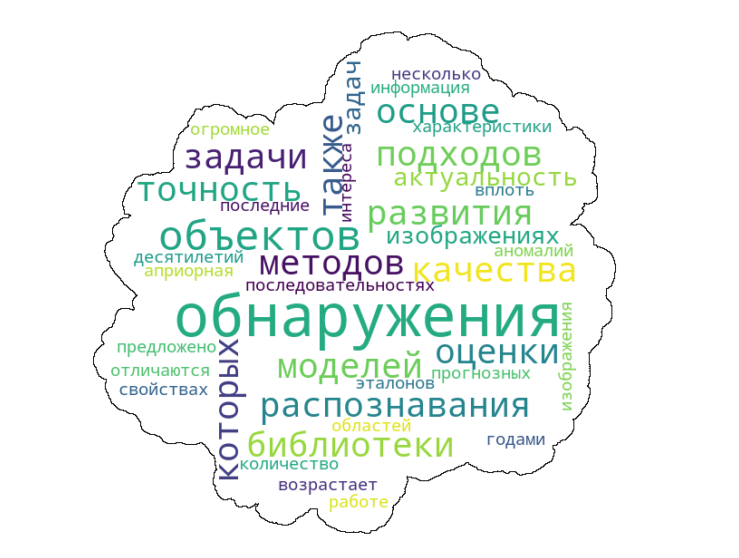

In [ ]:
#обработаем текст и выведем его в соответствии с каждой маской
i = 1
for tcm in transformed_cloud_masks:
  wc = WordCloud(max_words=40, mask=tcm, contour_width=0.5, background_color="white", contour_color='black')
  # генерируем облако слов
  wc.generate(txt)
  # сохраняем его в файл
  wc.to_file("word-cloud"+str(i)+".jpg")
  # визуализация
  plt.figure(figsize=[20,10])
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  i = i + 1
plt.show()

## Кейс №3

Ваше задание подготовить Облако слов на основе введенных вами данных ожиданий от стажировки (датасет case3.txt) исправив предложенное решение, либо с использованием онлайн сервиса: https://wordscloud.pythonanywhere.com/